In [182]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

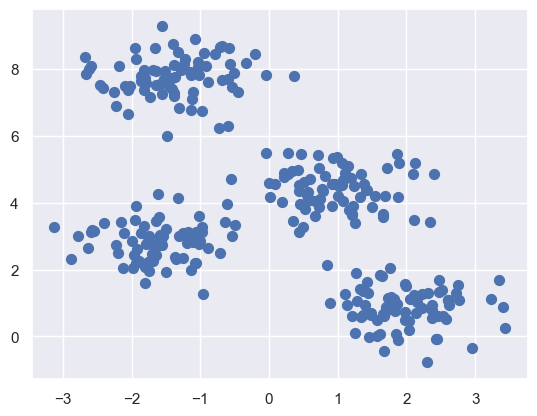

In [183]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [184]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

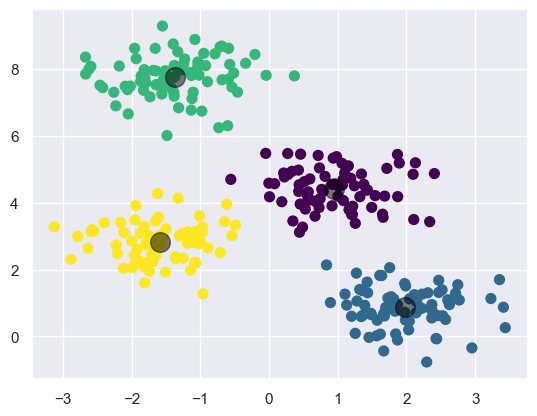

In [185]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

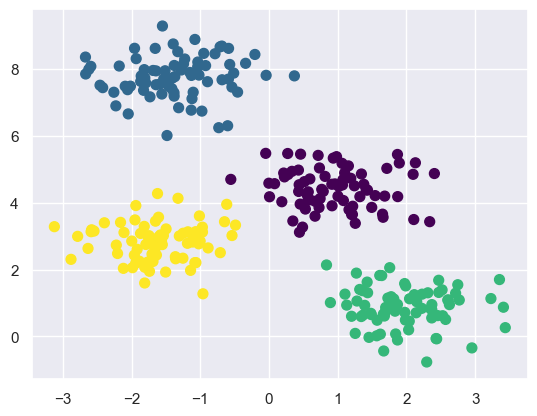

In [186]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

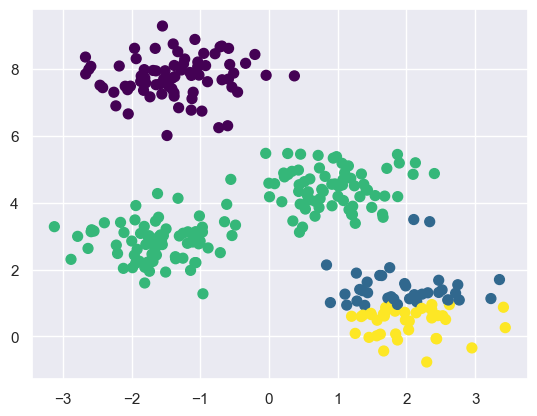

In [187]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

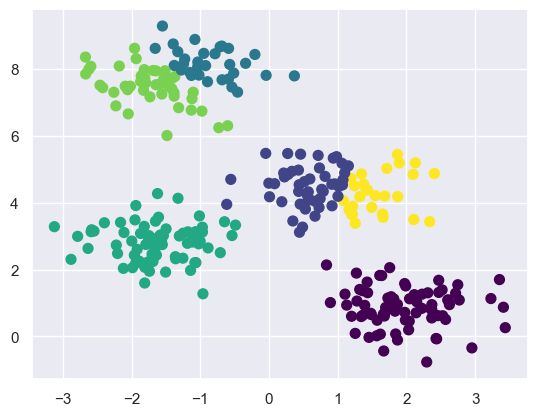

In [188]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [189]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

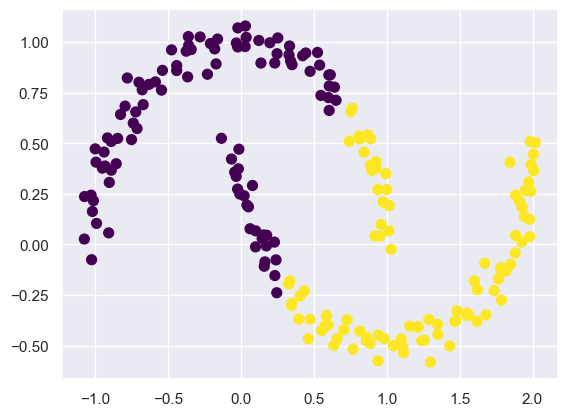

In [190]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

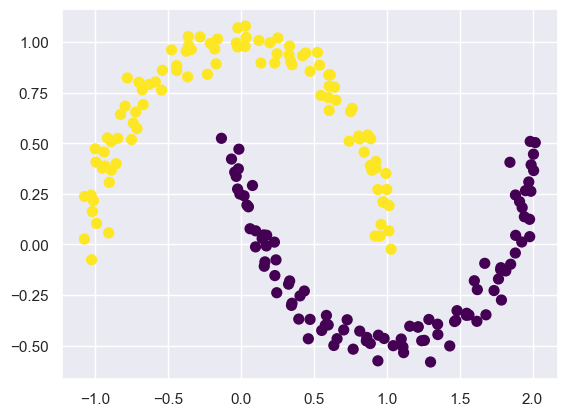

In [191]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')

labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### 1.	Terapkan konsep kompresi citra menggunakan image pilihan sendiri

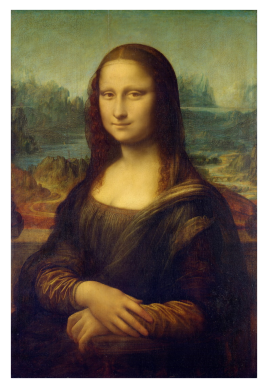

In [192]:
flower = plt.imread('data/monalisa.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [193]:
flower.shape

(1085, 728, 3)

In [194]:
# reshape ke 2D
data = flower / 255.0
data = data.reshape(1085 * 728, 3)
data.shape

(789880, 3)

In [195]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

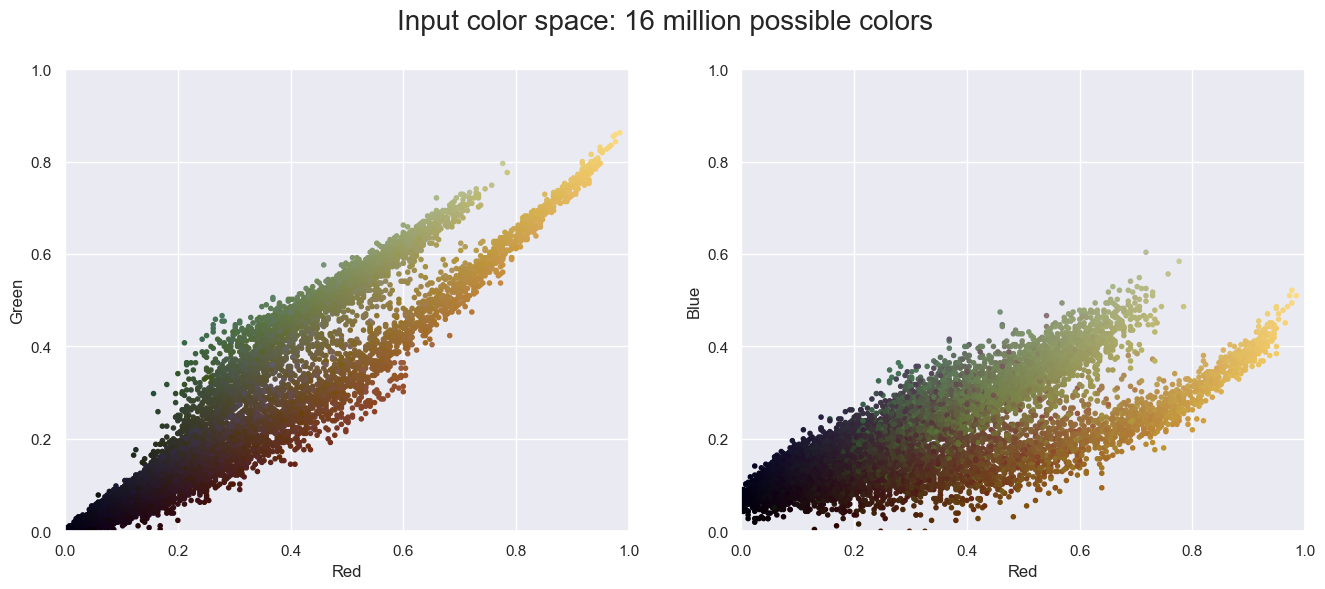

In [196]:
plot_pixels(data, title='Input color space: 16 million possible colors')

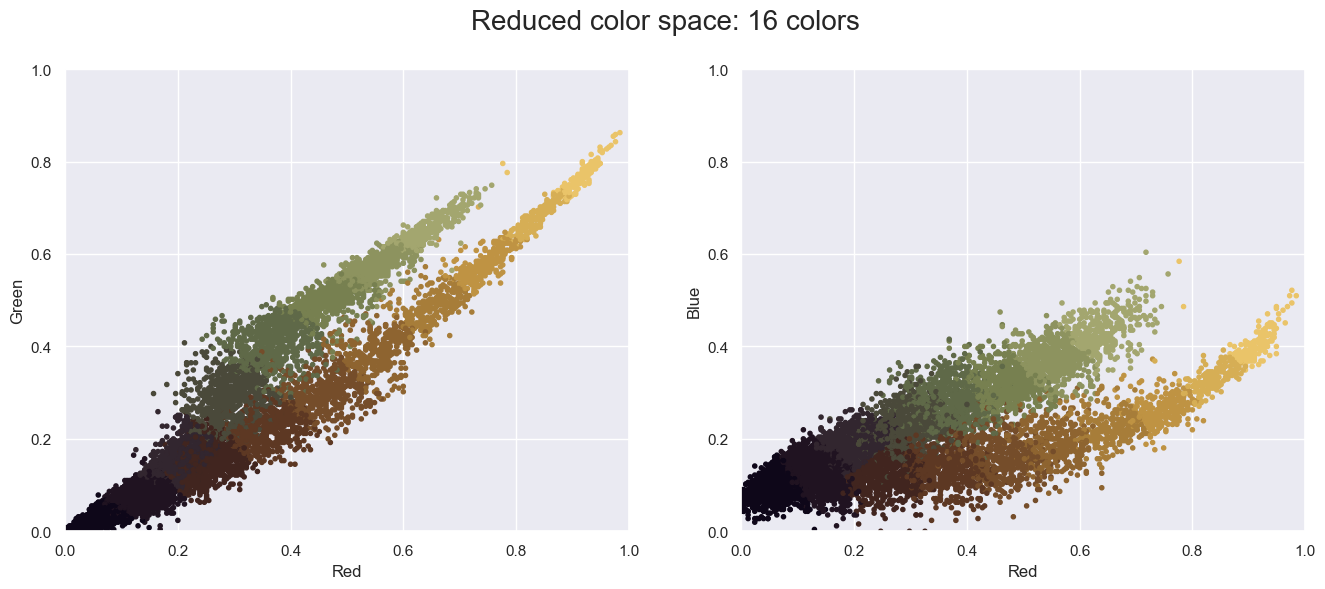

In [197]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

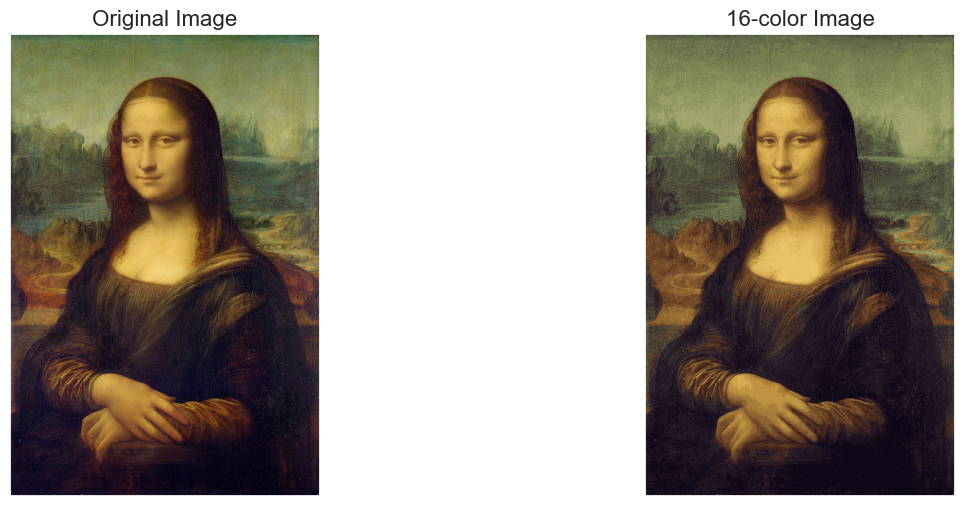

In [198]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

### 2.	Tentukan hasil Elbow Method dan visualisasi line chartnya dengan function sebagai berikut:

In [199]:
# Menentukan Hasil Elbow Method
from sklearn.cluster import KMeans

def calculate_WSS(points, kmax):
    sse = []

    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) * 2 + (points[i, 1] - curr_center[1]) * 2

        sse.append(curr_sse)

    return sse

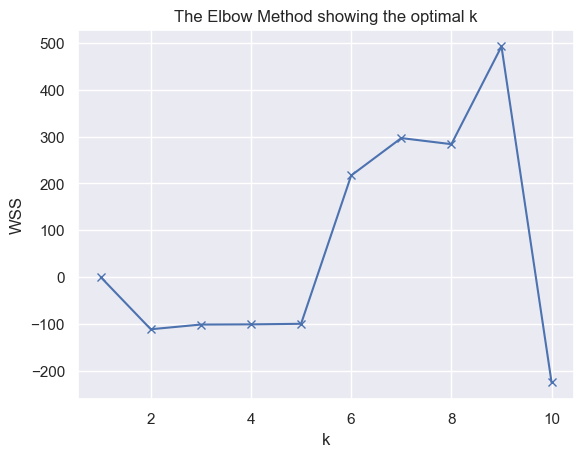

In [200]:
# Menentukan Hasil Elbow Method
wss = calculate_WSS(data, 10)

# Visualisasi Hasil Elbow Method dengan scatter plot
plt.plot(range(1, 11), wss, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [201]:
# Tentukan  silhoutte dan line chartnya
from sklearn.metrics import silhouette_score

def calculate_silhouette(points, kmax):
    s = []

    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(points)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

        curr_s = silhouette_score(points, labels, metric='euclidean')
        s.append(curr_s)

    return s

# Menentukan Hasil Elbow Method
s = calculate_silhouette(data, 10)

# Visualisasi Hasil Elbow Method dengan scatter plot
plt.plot(range(2, 11), s, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('The Silhouette Method showing the optimal k')
plt.show()